# Get information for all the motifs

In [7]:
from __future__ import division
import pandas as pd
import ast,json


def GetMotif(cluster):
    Protein = []; AA_ls = []; Prop_ls = []
    for atom in cluster:
        Protein.append(atom[:4])
        aa = atom[5:atom.rindex("_")][:3]
        at = atom[atom.rindex("_")+1:]
        if aa[:2] in ["CA", "FE", "MN", "ZN", "MG", "CU"]:
            aa = " " + aa[:2]
            at = aa[1:3]
        AA_ls.append(aa)
        
        if aa in atom_type.keys() and at in atom_type[aa].keys():
            pp = atom_type[aa][at]
            Prop_ls.append(pp)
            
    at_prop = []; aa_prop = []; size = 0
    
    for aa in ['ALA', 'GLY', 'PRO', 'ILE', 'LEU', 'VAL', 'PHE', 'TYR', 'TRP', 'ASN',
               'CYS', 'MET', 'THR', 'SER', 'GLN', 'ASP', 'GLU', 'LYS', 'ARG', 'HIS']:
        aa_prop.append(AA_ls.count(aa)/len(AA_ls))
    
    for prop in sorted(prop_dic.keys()):
        at_prop.append(Prop_ls.count(prop)/len(Prop_ls))
    
    size = len(Protein)/len(set(Protein))
    
    return aa_prop, at_prop, size

##################################################### atom properties ################################################
atom_type = {'ALA':{'O':2, 'C':6, 'CA':6, 'N':3,'CB':4},
             'GLY':{'O':2, 'C':6, 'CA':6, 'N':3},
             'PRO':{'O':2, 'C':6, 'CA':6, 'CB':4, 'N':3, 'CG':4, 'CD':4},
             'ASN':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':6, 'OD1':2, 'ND2':3},
             'ASP':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':6, 'OD1':2, 'OD2':1},
             'PHE':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':5, 'CD1':5, 'CD2':5, 'CE1':5, 'CE2':5, 'CZ':5},
             'LYS':{'O':2, 'C':6, 'CA':6, 'N':3, 'CG':4, 'CD':4, 'CE':6, 'NZ':3},
             'ILE':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG1':4, 'CG2':4, 'CD1':4},
             'LEU':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':4, 'CD1': 4, 'CD2':4},
             'ARG':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':4, 'CD':6, 'NE':3, 'CZ':4, 'NH1':3, 'NH2':1},
             'CYS':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':6, 'SG':6},
             'MET':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':6, 'SG':6, 'CE':6},
             'THR':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':6, 'CG2':4, 'OG1':1},
             'TYR':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':5, 'CD1':5, 'CD2':5,'CE1':5, 'CE2':5, 'CZ':5, 'OH':1},
             'HIS':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':5, 'ND1':3, 'CD2':5, 'CE1':5, 'NE2':2},
             'VAL':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG1':4, 'CG2':4},
             'SER':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'OG':1},
             'GLU':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':3, 'CD':6, 'OE1':2,'OE2':1},
             'GLN':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':3, 'CD':6, 'OE1':2,'NE2':3},
             'TRP':{'O':2, 'C':6, 'CA':6, 'N':3, 'CB':4, 'CG':6, 'CD1':4, 'CD2':5, 'NE1':3, 'CE2':5, 'CE3':5,'CZ2':5, 'CZ3':5, 'CH2':5},
             ' FE':{'FE':7}, ' CU':{'CU':7}, ' MN':{'MN':7}, ' ZN':{'ZN':7}, ' CA':{'CA':7}, ' MG':{'MG':7}}

prop_dic = {1:'hydrophibic',2:'acceptor',3:'donor',4:'hydrophobic',5:'aromatic',6:'neutral',7:'metal'}

#######################################################################################################

assign = pd.read_excel('assign.xlsx') ## The dataframe for the cluster assignment for each FG
fg_ls = []
for i in range(assign.shape[0]):
    lig = assign['ligands'][i]
    cls_dic = ast.literal_eval(assign['assign'][i])
    for cls in cls_dic.keys():
        fg = cls_dic[cls]
        fg_ls.append((fg,str(lig),cls)) ## A list of FG and the corresponding cluster assignment

######################################################################################################

        
name_ls = []; lig_ls = []; cls_ls = []; aa_prop_ls = []; at_prop_ls = []; size_ls = []  

for fg in sorted(fg_ls):
    name = fg[0]; lig = fg[1]; cls = fg[2]
    stat = json.loads(open('../Motif_all/statistic/'+lig,'r').read())
    cluster = stat['pro'][cls]
    #print cluster
    aa_prop,at_prop,size = GetMotif(cluster)
    name_ls.append(name); lig_ls.append(lig); cls_ls.append(cls)
    aa_prop_ls.append(aa_prop); at_prop_ls.append(at_prop); size_ls.append(size)

######### Get the dataframe of all the information for each motif ##############
df_motif = pd.DataFrame({'FG.name':name_ls,'Ligand':lig_ls,'Cluster':cls_ls,'AA.property':aa_prop_ls,'Size': size_ls,
                        'Atom.property':at_prop_ls},columns=['FG.name','Ligand','Cluster','AA.property','Atom.property','Size'])


In [8]:
df_motif

,FG.name,Ligand,Cluster,AA.property,Atom.property,Size
0,"1,2-dihydroxybenzene",QUE,cluster1,"[0.00331125827815, 0.0, 0.0198675496689, 0.086...","[0.111111111111, 0.0639730639731, 0.0909090909...",14.380952
1,"1,3-dihydroxy-5-ethenylbenzene",STL,cluster2,"[0.0, 0.0, 0.0502283105023, 0.0593607305936, 0...","[0.0694444444444, 0.0694444444444, 0.083333333...",13.687500
2,1-formyl-piperidine--2-carboxamide-5-amino,NXL,cluster2,"[0.0, 0.0, 0.0, 0.025974025974, 0.071428571428...","[0.105263157895, 0.125, 0.177631578947, 0.1513...",15.400000
3,"2,3-Dideoxyribose",DCT,cluster2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.42, 0.0...","[0.14, 0.07, 0.13, 0.04, 0.54, 0.08, 0.0]",11.111111
4,"2,3-dihydroxypropionate",MPG,cluster1,"[0.0, 0.0, 0.0384615384615, 0.0769230769231, 0...","[0.08, 0.0, 0.0, 0.48, 0.36, 0.08, 0.0]",8.666667
5,"2,6,6-Trimethyl-1-cyclohexene",REA,cluster3,"[0.0, 0.0, 0.0, 0.108108108108, 0.162162162162...","[0.032967032967, 0.0164835164835, 0.0659340659...",18.500000
6,2-Deoxy-D-Galactose,A2G,cluster2,"[0.0, 0.0, 0.0045045045045, 0.0045045045045, 0...","[0.126410835214, 0.10158013544, 0.142212189616...",18.500000
7,2-Deoxy-D-Glucose,NAG,cluster2,"[0.0, 0.0, 0.00826446280992, 0.0175619834711, ...","[0.128764278297, 0.0872274143302, 0.1381100726...",14.892308
8,2-Deoxy-D-Glucose,NDG,cluster2,"[0.0, 0.0, 0.0, 0.0172413793103, 0.01149425287...","[0.109195402299, 0.120689655172, 0.14942528735...",12.428571
9,2-Deoxyribose,DGT,cluster2,"[0.0, 0.0, 0.0, 0.0972222222222, 0.07870370370...","[0.115, 0.045, 0.105, 0.285, 0.395, 0.055, 0.0]",7.200000


# Get feature matrix of atom and AA properties

In [48]:
from sklearn.manifold import TSNE

motif_all = [list(df_motif['AA.property'][i])+list(df_motif['Atom.property'][i]) \
             for i in range(df_motif.shape[0])]

fg_all = [df_motif['FG.name'][i]+'_'+str(df_motif['Ligand'][i])+'_'+str(df_motif['Cluster'][i]) \
          for i in range(df_motif.shape[0])]

X = pd.DataFrame(motif_all) ## The feature matrix for all the motifs

X.index = fg_all

## Dimension reduction using t-SNE
X_embedded = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(X) 

X_embedded

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 481 samples in 0.000s...
[t-SNE] Computed neighbors for 481 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 481 / 481
[t-SNE] Mean sigma: 0.122440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.294518
[t-SNE] KL divergence after 300 iterations: 0.852996


array([[ 1.35479965e+01, -1.58083689e+00],
       [ 1.26680803e+01, -1.59215796e+00],
       [ 5.49897766e+00,  5.26603889e+00],
       [ 1.05189419e+00, -4.03903008e+00],
       [ 1.36783447e+01, -7.51743984e+00],
       [ 1.57270699e+01, -3.04714704e+00],
       [ 4.63065577e+00, -2.11885452e+00],
       [ 2.30611205e+00, -4.80682945e+00],
       [ 1.52470338e+00,  8.99613559e-01],
       [ 4.67603683e+00, -1.09534674e+01],
       [-1.08921652e+01, -4.49366212e-01],
       [ 2.90416265e+00, -1.10104799e+01],
       [ 2.51362658e+00,  5.75446796e+00],
       [-3.37839746e+00,  9.16888475e-01],
       [-8.77045631e+00, -1.53987980e+00],
       [ 3.07314730e+00, -1.00427246e+01],
       [-3.94562185e-01, -3.27461982e+00],
       [ 1.63384056e+01, -4.07123041e+00],
       [ 5.91453266e+00, -1.03659477e+01],
       [ 1.49107161e+01, -2.18925309e+00],
       [-3.46749425e-01,  2.70022774e+00],
       [ 6.50088358e+00,  2.81034279e+00],
       [-4.71667796e-01,  6.13833523e+00],
       [-1.

# Determine the number of clusters

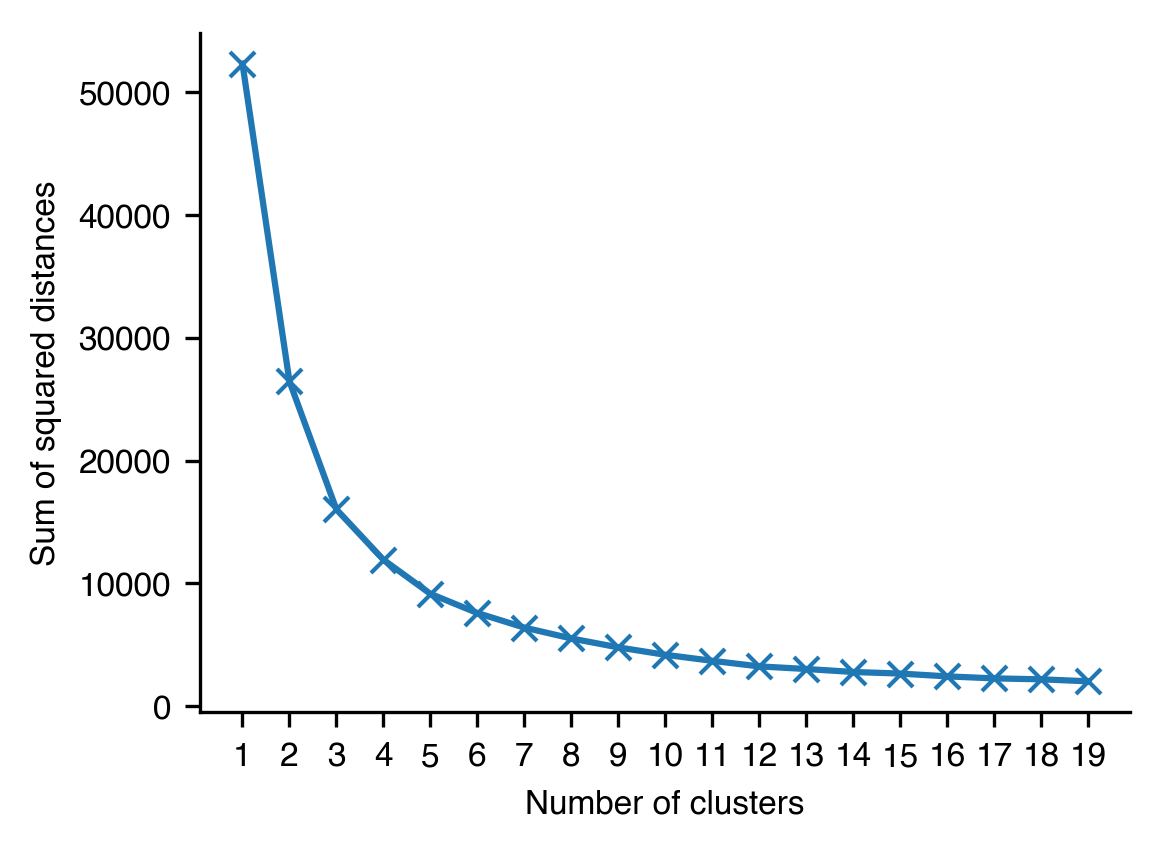

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,20)

for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(X_embedded)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(4,3),dpi=300)
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Helvetica"

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(K, Sum_of_squared_distances, 'x-')
plt.xticks(K)

plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
#plt.title('Elbow Method For Optimal k')
plt.show()

# Visaulization of motif clusters 

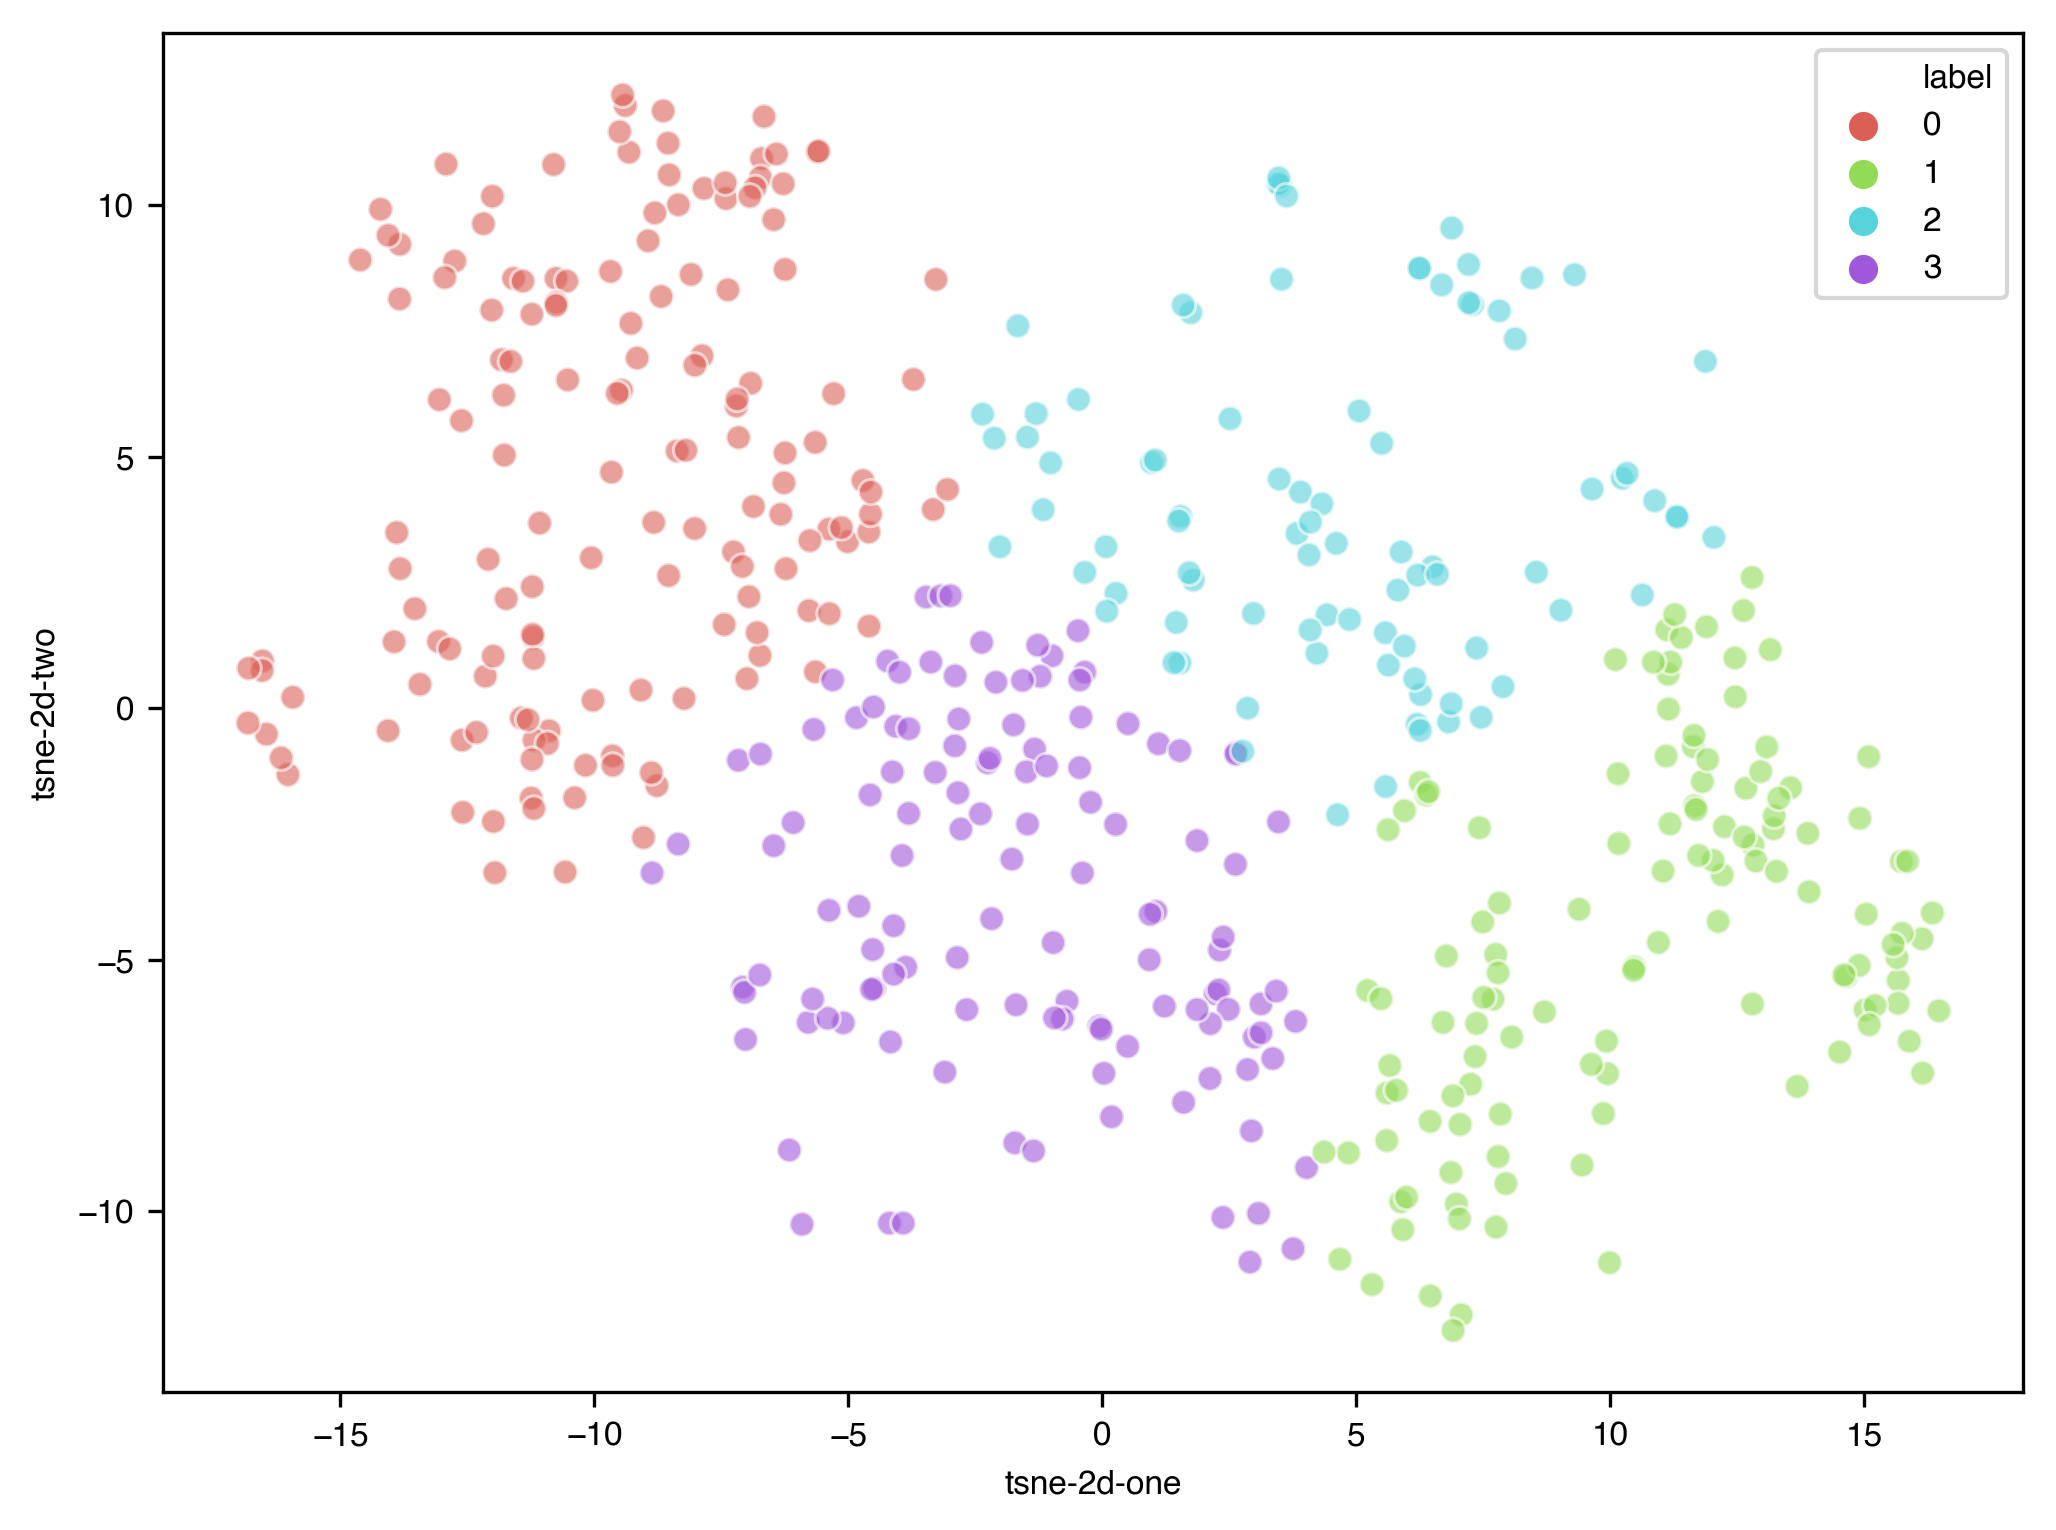

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_embedded) ## k-means clustering


df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
df_subset['label'] = kmeans.labels_

plt.figure(figsize=(8,6),dpi=300)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='label',
    palette=sns.color_palette("hls",4),
    data = df_subset,
    alpha=0.6,
    legend='full'
)

plt.show()

# Motif analysis within each cluster

In [52]:
f = open('Cluster_file','r').read()
clust_dic = json.loads(f)


motif_df = pd.read_csv('FG_binding_motif_all.csv')
motif_dic = {}
for i in range(motif_df.shape[0]):
    fg = motif_df['FG.name'][i]
    ligand = motif_df['Ligand'][i]
    cls = motif_df['Cluster'][i]
    at_ls = ast.literal_eval(motif_df['Atom.property'][i])
    aa_ls = ast.literal_eval(motif_df['AA.property'][i])
    motif_dic[fg+'_'+ligand+'_'+cls] = (aa_ls,at_ls)

aa_sum = []; at_sum = []

for fg in clust_dic['0']: ## Look into the motifs in cluster1, '1' for cluster2,'2' for cluster3, '3' for cluster4 
    if fg in motif_dic:
        aa_sum.append(motif_dic[fg][0])
        at_sum.append(motif_dic[fg][1])
    
at_df = pd.DataFrame(at_sum,columns=['hydrophibic','acceptor','donor','hydrophobic','aromatic','neutral','metal'])
aa_df = pd.DataFrame(aa_sum,columns=['ALA', 'GLY', 'PRO', 'ILE', 'LEU', 'VAL', 'PHE', 'TYR', 'TRP', 'ASN',
                     'CYS', 'MET', 'THR', 'SER', 'GLN', 'ASP', 'GLU', 'LYS', 'ARG', 'HIS'])

print aa_df.mean(axis=0)
print at_df.mean(axis=0)

ALA    0.000190
GLY    0.000217
PRO    0.013016
ILE    0.033578
LEU    0.056009
VAL    0.022823
PHE    0.127725
TYR    0.191686
TRP    0.142251
ASN    0.042691
CYS    0.004805
MET    0.020839
THR    0.026480
SER    0.014710
GLN    0.037478
ASP    0.055533
GLU    0.063154
LYS    0.024101
ARG    0.060383
HIS    0.062330
dtype: float64
hydrophibic    0.108986
acceptor       0.071688
donor          0.104830
hydrophobic    0.181800
aromatic       0.428290
neutral        0.104407
metal          0.000000
dtype: float64


# Amino acids distributions 

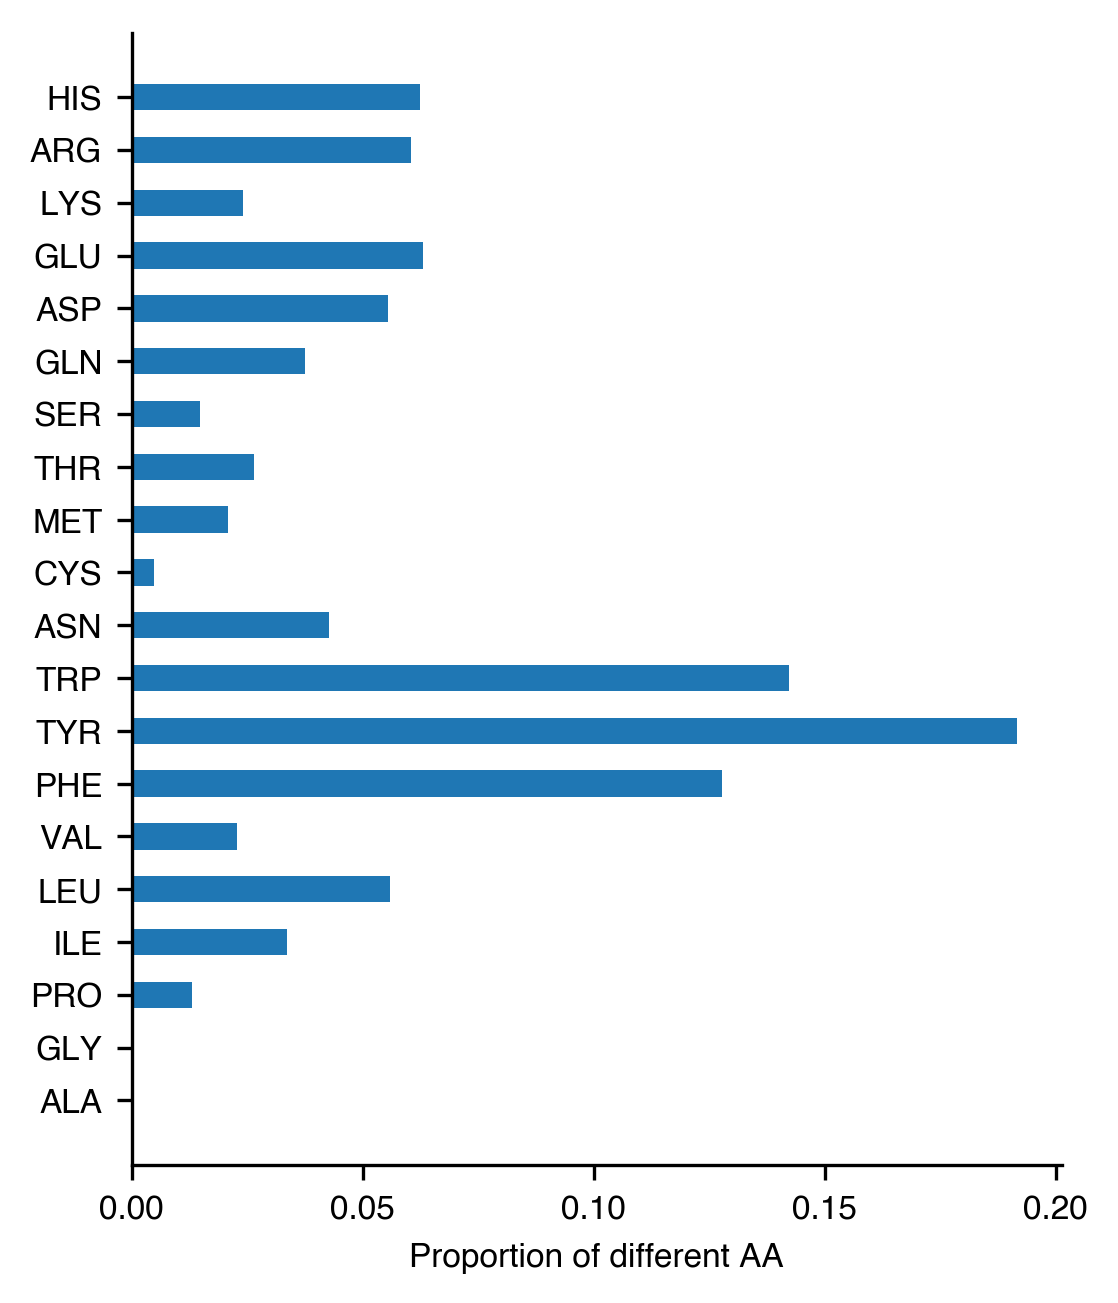

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5),dpi=300)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "Helvetica"

labels = ['ALA', 'GLY', 'PRO', 'ILE', 'LEU', 'VAL', 'PHE', 'TYR', 'TRP', 'ASN',
          'CYS', 'MET', 'THR', 'SER', 'GLN', 'ASP', 'GLU', 'LYS', 'ARG', 'HIS']
y_cor = [0.1*n for n in range(1,21)]

plt.barh(y_cor, aa_df.mean(axis=0),height=0.05, tick_label=labels)
plt.xlabel('Proportion of different AA')
plt.show()

# Atom property distributions

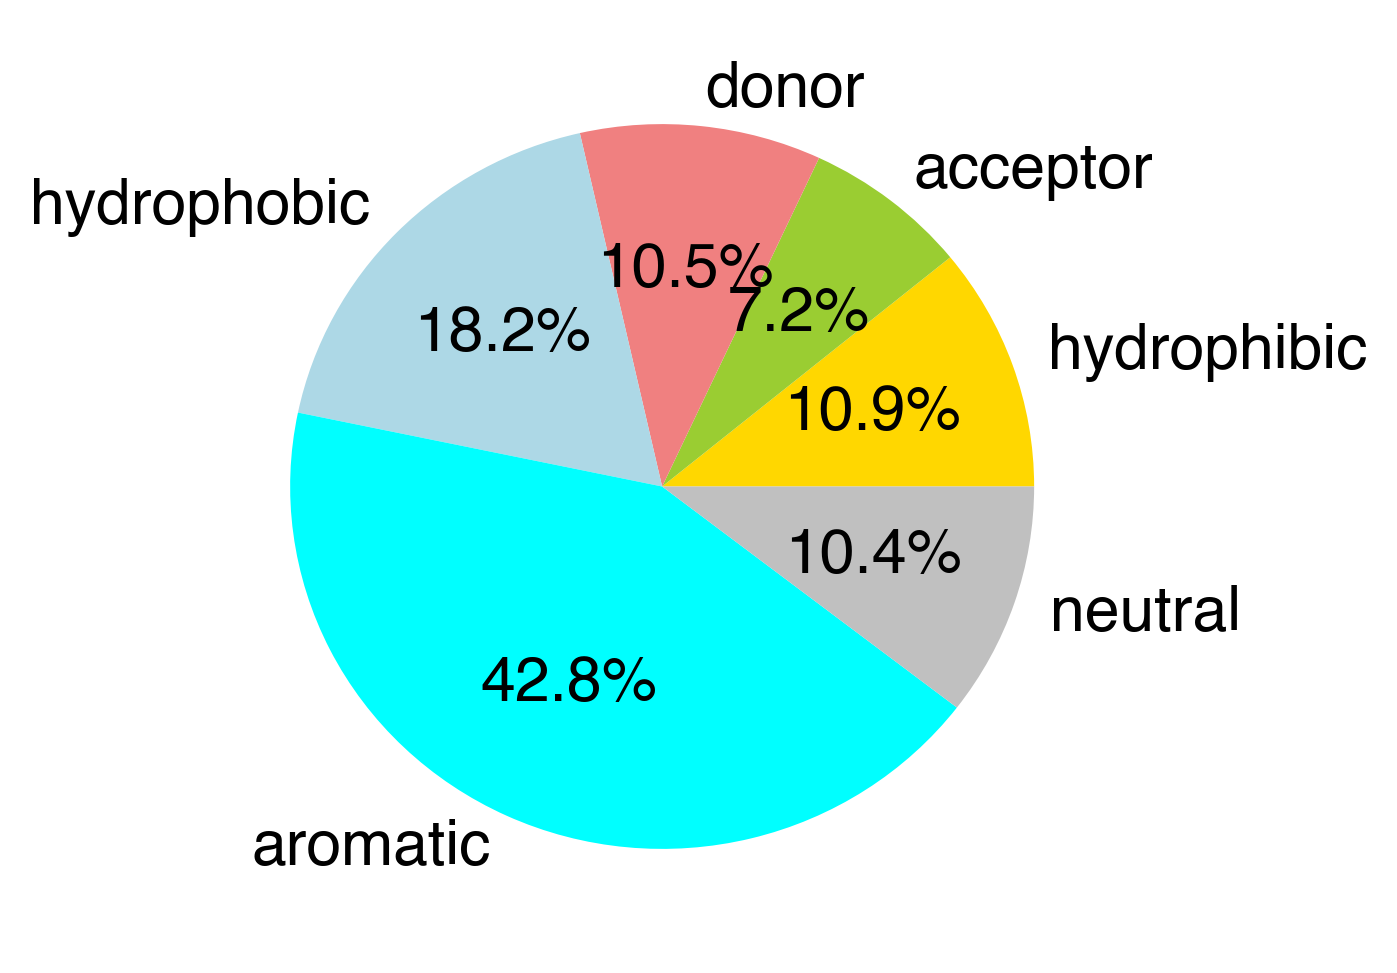

In [54]:
labels = ['hydrophibic','acceptor','donor','hydrophobic','aromatic','neutral']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightblue','cyan', 'silver', 'white', 'yellow']
sizes = at_df.mean(axis=0)[0:-1]

plt.figure(figsize=(4,4),dpi=300)
plt.rcParams["font.size"] = 15
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors[0:len(sizes)])
plt.show()